In [23]:
import sys
print(sys.executable)


c:\Users\HP\Documents\GitHub\youtube_full_project\.venv\Scripts\python.exe


In [24]:
from sklearn.model_selection import train_test_split


In [25]:
    # 03_modeling.ipynb
    # Machine Learning Models for High-Growth Prediction

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier

    plt.style.use("ggplot")

    print("Modeling notebook ready.")
    

Modeling notebook ready.


In [26]:
    # Load processed features
    features_path = "../data/processed/features.csv"
    df = pd.read_csv(features_path, parse_dates=["trending_date", "publish_date"])

    print("Features shape:", df.shape)
    df.head()
    

Features shape: (34598, 14)


,video_id,trending_date,publish_date,publish_hour,views,likes,dislikes,comment_count,like_view_ratio,comment_view_ratio,view_growth,growth_rate,high_growth,category_id
0,-0CMnp02rNY,2018-06-06,2018-06-04,13,475965,6531,172,271,0.013722,0.000569,129541.0,0.272165,1,24
1,-0CMnp02rNY,2018-06-07,2018-06-04,13,605506,7848,232,354,0.012961,0.000585,100480.0,0.165944,1,24
2,-0CMnp02rNY,2018-06-08,2018-06-04,13,705986,8930,277,371,0.012649,0.000526,48287.0,0.068397,0,24
3,-0CMnp02rNY,2018-06-09,2018-06-04,13,754273,9395,303,383,0.012456,0.000508,38340.0,0.050830,0,24
4,-0CMnp02rNY,2018-06-10,2018-06-04,13,792613,9720,330,413,0.012263,0.000521,7746.0,0.009773,0,24


In [27]:
    # Define feature matrix X and target y
    # We avoid using view_growth / growth_rate as predictors because they are derived from future information.
    feature_cols = [
        "views",
        "likes",
        "dislikes",
        "comment_count",
        "like_view_ratio",
        "comment_view_ratio",
        "publish_hour",
        "category_id",
    ]

    X = df[feature_cols].copy()
    y = df["high_growth"].astype(int)

    X.head()
    

,views,likes,dislikes,comment_count,like_view_ratio,comment_view_ratio,publish_hour,category_id
0,475965,6531,172,271,0.013722,0.000569,13,24
1,605506,7848,232,354,0.012961,0.000585,13,24
2,705986,8930,277,371,0.012649,0.000526,13,24
3,754273,9395,303,383,0.012456,0.000508,13,24
4,792613,9720,330,413,0.012263,0.000521,13,24


In [28]:
    # Train-test split (time-ignorant simple split; can be refined later)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])
    

Train size: 27678 Test size: 6920


In [29]:
    # Baseline model: Logistic Regression
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)

    y_pred_lr = log_reg.predict(X_test)

    print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred_lr))
    print("Logistic Regression F1:", f1_score(y_test, y_pred_lr))
    print("\nClassification report (LogReg):\n", classification_report(y_test, y_pred_lr))
    

Logistic Regression accuracy: 0.7495664739884393
Logistic Regression F1: 0.011409013120365089

Classification report (LogReg):
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      5190
           1       0.43      0.01      0.01      1730

    accuracy                           0.75      6920
   macro avg       0.59      0.50      0.43      6920
weighted avg       0.67      0.75      0.65      6920



In [30]:
    # Random Forest model
    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1,
    )
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)

    print("Random Forest accuracy:", accuracy_score(y_test, y_pred_rf))
    print("Random Forest F1:", f1_score(y_test, y_pred_rf))
    print("\nClassification report (Random Forest):\n", classification_report(y_test, y_pred_rf))
    

Random Forest accuracy: 0.8091040462427745
Random Forest F1: 0.47181127548980406

Classification report (Random Forest):
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      5190
           1       0.77      0.34      0.47      1730

    accuracy                           0.81      6920
   macro avg       0.79      0.65      0.68      6920
weighted avg       0.80      0.81      0.78      6920



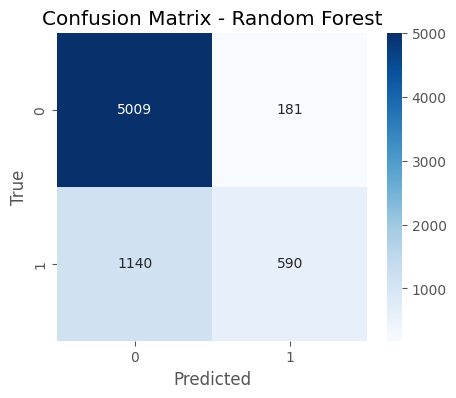

In [31]:
    # Confusion matrix for Random Forest
    cm = confusion_matrix(y_test, y_pred_rf)
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title("Confusion Matrix - Random Forest")
    plt.show()
    

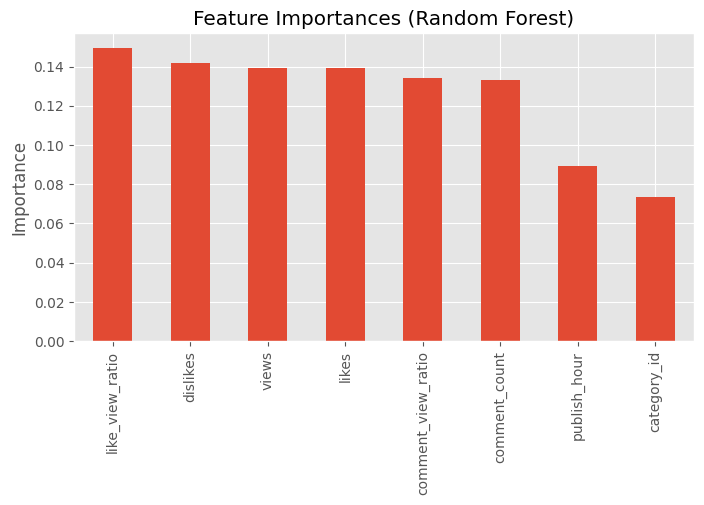

like_view_ratio       0.149528
dislikes              0.141820
views                 0.139494
likes                 0.139353
comment_view_ratio    0.134045
comment_count         0.133172
publish_hour          0.089170
category_id           0.073420
dtype: float64

In [32]:
    # Feature importance from Random Forest
    importances = rf.feature_importances_
    fi = pd.Series(importances, index=feature_cols).sort_values(ascending=False)

    plt.figure(figsize=(8, 4))
    fi.plot(kind="bar")
    plt.title("Feature Importances (Random Forest)")
    plt.ylabel("Importance")
    plt.show()

    fi
    